In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout

In [2]:
df = pd.read_csv('FIC.Full CSV.csv')
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [3]:
label_encoder = preprocessing.LabelEncoder()
col = df.columns
df_new = df.copy()
for c in col:
    df_new[c] = label_encoder.fit_transform(df_new[c])
df_new.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,6,2,0,0,0,0,0,0,1,1,...,24,1,0,2,1,1,4,0,0,21
1,10,3,0,1,0,0,0,0,1,1,...,10,1,0,2,1,1,4,0,0,10
2,14,3,0,0,0,1,1,0,1,1,...,27,1,0,0,1,1,4,0,0,5
3,14,3,0,0,0,1,1,0,1,1,...,16,1,1,2,2,1,4,0,0,18
4,15,3,0,0,0,1,0,0,1,1,...,30,2,2,2,2,1,4,0,0,15


In [4]:
y = df_new['Mortality']
X = df_new.drop(['Mortality'] , axis=1)
selection = ExtraTreesRegressor()
selection.fit(X,y)
for i in range(len(selection.feature_importances_)):
    print(f'column-{(df_new.columns[i]).strip()} ,importance = {selection.feature_importances_[i]} ')

column-Age ,importance = 0.0573103129138467 
column-Age.Group ,importance = 0.12181608383403762 
column-Gender ,importance = 0.03668450781165785 
column-Locality ,importance = 0.021254106341724595 
column-Marital status ,importance = 0.0001527777777777776 
column-Life.Style ,importance = 0.009316932120863777 
column-Sleep ,importance = 0.004725563945530286 
column-Category ,importance = 0.0025210059636536436 
column-Depression ,importance = 0.0015855091219881632 
column-Hyperlipi ,importance = 0.0007235782622977748 
column-Smoking ,importance = 0.0031088376884212663 
column-Family.History ,importance = 0.004907550388678391 
column-F.History ,importance = 0.002554658270483395 
column-Diabetes ,importance = 0.10248383940312257 
column-HTN ,importance = 0.004430935375133454 
column-Allergies ,importance = 0.0011889459729719906 
column-BP ,importance = 0.014872909305372913 
column-Thrombolysis ,importance = 0.0 
column-BGR ,importance = 0.005660143718043968 
column-B.Urea ,importance = 0.0

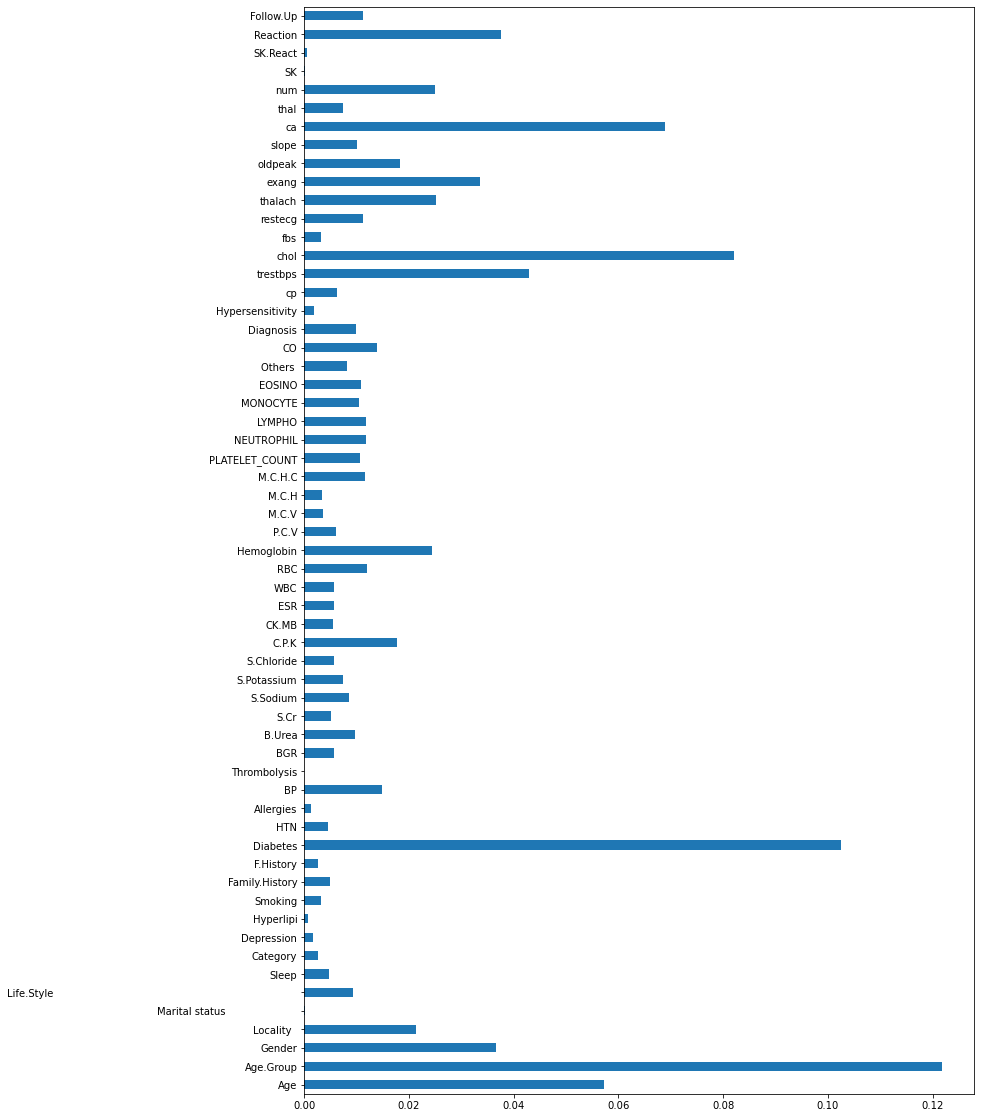

In [5]:
plt.figure(figsize = (12,20))
important_features = pd.Series(selection.feature_importances_, index=X.columns)
important_features.plot(kind='barh')
plt.show()

In [6]:
important_features = pd.Series(selection.feature_importances_, index=X.columns).nlargest(15).index
X = X[important_features]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(15,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [8]:
model.fit(X_train,y_train , epochs=40, batch_size=20)

Epoch 1/40
17/17 [==============================] - 3s 18ms/step - loss: 0.8676 - binary_accuracy: 0.7462
Epoch 2/40
17/17 [==============================] - 0s 19ms/step - loss: 0.4189 - binary_accuracy: 0.8097
Epoch 3/40
17/17 [==============================] - 0s 19ms/step - loss: 0.3980 - binary_accuracy: 0.8278
Epoch 4/40
17/17 [==============================] - 0s 19ms/step - loss: 0.3774 - binary_accuracy: 0.8520
Epoch 5/40
17/17 [==============================] - 0s 20ms/step - loss: 0.3607 - binary_accuracy: 0.8489
Epoch 6/40
17/17 [==============================] - 0s 21ms/step - loss: 0.2702 - binary_accuracy: 0.8792
Epoch 7/40
17/17 [==============================] - 0s 23ms/step - loss: 0.2993 - binary_accuracy: 0.8610
Epoch 8/40
17/17 [==============================] - 0s 16ms/step - loss: 0.2827 - binary_accuracy: 0.8731
Epoch 9/40
17/17 [==============================] - 0s 14ms/step - loss: 0.2176 - binary_accuracy: 0.9003
Epoch 10/40
17/17 [===========================

In [9]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.0935 - binary_accuracy: 0.9730
Accuracy: 97.30
